# Deep Learning Notebook

Deep learning frameworks simplify building and training neural networks. The two most popular are PyTorch and TensorFlow.

In [1]:
# To start, install PyTorch and dependencies:
# pip install torch torchvision torchaudio numpy matplotlib

import torch
print(torch.__version__)

2.7.1+cpu


In [2]:
# Check for GPU support:
print(torch.cuda.is_available())

False


In [4]:
# Create a simple neural network:
import torch.nn as nn
import torch.nn.functional as F

# Define the neural network class
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(784, 128)  # Input (784) to hidden (128)
        self.fc2 = nn.Linear(128, 10)   # Hidden (128) to output (10)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten 28x28 images
        x = F.relu(self.fc1(x))  # ReLU activation
        x = self.fc2(x)  # Raw logits
        return x  # CrossEntropyLoss applies softmax internally
    
print(SimpleNN)

<class '__main__.SimpleNN'>


In [ ]:
# Training Process: Loading & Training with Loss Function, Optimizer, and Training Loop

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load MNIST datasets
trainset = datasets.MNIST('data', train=True, download=True, transform=transform)
testset = datasets.MNIST('data', train=False, download=True, transform=transform)

# Create data loaders
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

# Initialize model, loss, and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}")

100.0%
100.0%
100.0%
100.0%


Epoch 1, Loss: 0.7533
Epoch 2, Loss: 0.3666
Epoch 3, Loss: 0.3202
Epoch 4, Loss: 0.2935
Epoch 5, Loss: 0.2718
Epoch 6, Loss: 0.2529
Epoch 7, Loss: 0.2352
Epoch 8, Loss: 0.2192
Epoch 9, Loss: 0.2054
Epoch 10, Loss: 0.1932


Test Accuracy: 94.72%


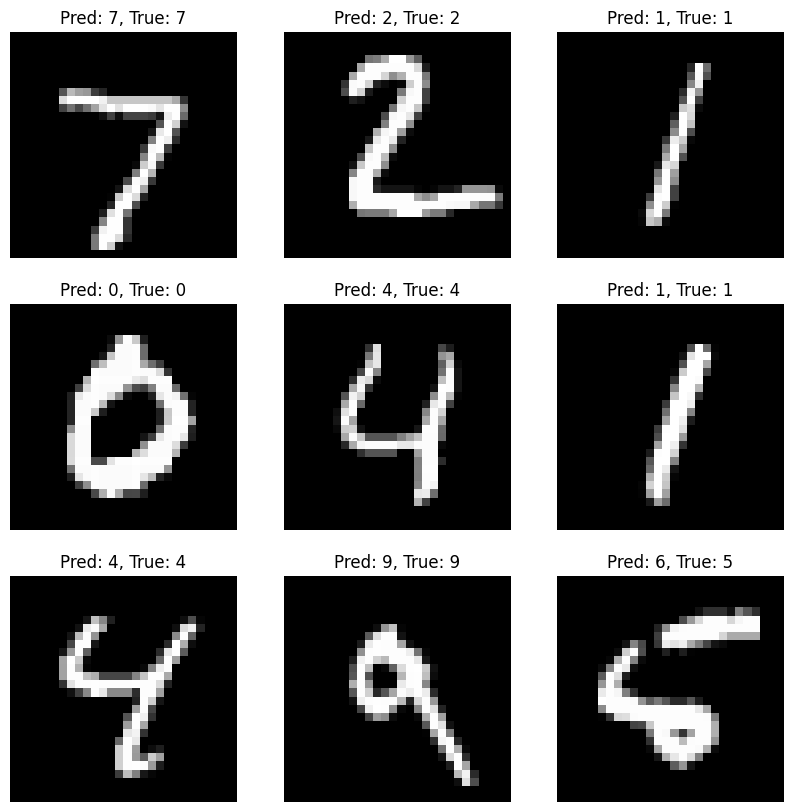

In [7]:
# Inference & Visualization

import matplotlib.pyplot as plt

# Test the model
model.eval()  # Set to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # Disable gradient computation
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Visualize predictions
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot 9 images
fig = plt.figure(figsize=(10, 10))
for i in range(9):
    ax = fig.add_subplot(3, 3, i+1)
    ax.imshow(images[i].view(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predicted[i]}, True: {labels[i]}")
    ax.axis('off')
plt.show()